# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

In [12]:
from math import pi
def mult_dec_pi(a, b):
    stringpi=str(pi)
    p=stringpi.replace(".",'')
    if a <= 0 or b <= 0 or a>15 or b > 15:
        print ("Error")
        
    else:
        result =(int(p[a]))*(int(p[b]))
        print(result)

In [13]:
mult_dec_pi(2,3)

4


In [14]:
mult_dec_pi(6,0)

Error


In [15]:
mult_dec_pi(a=2, b=4)
# 20.0

20


In [16]:
mult_dec_pi(a=5, b=10)
# 45.0

45


In [17]:
mult_dec_pi(a=14, b=1)
# 9.0

9


In [18]:
mult_dec_pi(a=6, b=8)
# 10.0

10


In [19]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

Error


# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

Text(0, 0.5, 'Employed')

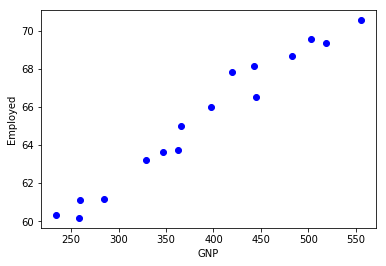

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

In [21]:
columns_name=("Date","Employed","GNP")
DF= pd.DataFrame(data, columns=columns_name)
y=DF.Employed
x= DF.GNP
x=sm.add_constant(x)
model = sm.OLS(y,x)
results=model.fit()

In [22]:
results.params

const    51.843590
GNP       0.034752
dtype: float64

In [23]:
yhat= results.params[0]+results.params[1]*(x.GNP)

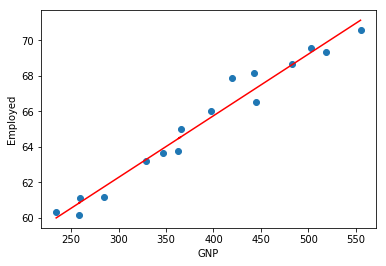

In [24]:
plt.scatter([x.GNP],[y])
plt.xlabel("GNP")
plt.ylabel("Employed")
plt.plot(x.GNP, yhat,c='red')

# Exercise 01.3

Analyze the baby names dataset using pandas

In [25]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('../datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [26]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [27]:
names[names.year == 1993].head()   

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


In [28]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258000 entries, 0 to 257999
Data columns (total 5 columns):
year       258000 non-null int64
name       258000 non-null object
prop       258000 non-null float64
sex        258000 non-null object
soundex    258000 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 9.8+ MB


### segment the data into boy and girl names

In [29]:
boys = names[names.sex == 'boy']   
girls = names[names.sex == 'girl'].copy()
print(type(boys))


<class 'pandas.core.frame.DataFrame'>


### Analyzing the popularity of a name over time

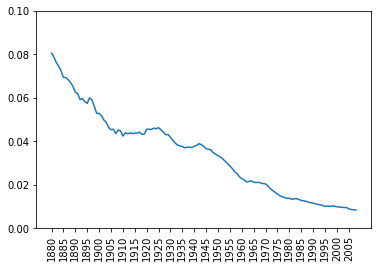

In [30]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

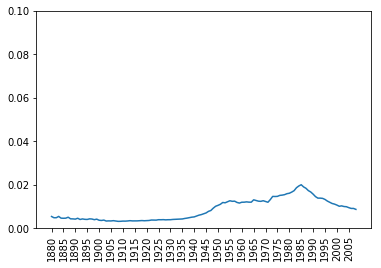

In [31]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

In [38]:
popular=boys.loc[1:,['year','name']]
popular

,year,name
1,1880,William
2,1880,James
3,1880,Charles
4,1880,George
5,1880,Frank
6,1880,Joseph
7,1880,Thomas
8,1880,Henry
9,1880,Robert
10,1880,Edward


In [36]:
import math as mt
boys['decade']=pd.cut(boys['year'].values,range(math.floor(min(boys['year'])/10)*10,math.ceil(max(boys['year'])/10)*10+10,10),False)
boys[boys.groupby(by=['decade'])['prop'].transform(max)==boys['prop']][['decade','name']]

/Users/andreasaenz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,decade,name
0,"[1880, 1890)",John
10000,"[1890, 1900)",John
20000,"[1900, 1910)",John
31000,"[1910, 1920)",John
49000,"[1920, 1930)",Robert
51000,"[1930, 1940)",Robert
64000,"[1940, 1950)",James
70000,"[1950, 1960)",James
89000,"[1960, 1970)",Michael
90000,"[1970, 1980)",Michael


# Exercise 01.4

Which has been the most popular girl name?


In [21]:
girls.name.max()

'Zula'

# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

In [22]:
girls[girls.year >= 2000].max()

year           2008
name           Zoie
prop       0.013017
sex            girl
soundex        Z600
dtype: object